<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/assignment_100322_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 사이킷런으로 시작하는 머신러닝
---

In [1]:
# 사이킷런 설치
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import package
import sklearn
import pandas as pd
import numpy as np

## 01 사이킷런 소개와 특징
___
- 사이킷런(scikit-learn)은 **파이썬 머신러닝 라이브러리** 중 가장 많이 사용되는 라이브러리
- 사이킷런의 특징
  1. 가장 쉽고 파이썬스러운 API를 제공한다.
  2. 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크, API를 제공한다.
  3. 오랜 기간 실전 환경에서 검증되어 매우 많은 환경에서 사용되는 라이브러리이다.
- 사이킷런 패키지 import
```python
import sklearn
```


In [3]:
# 사이킷런 버전 확인
print(sklearn.__version__)

1.0.2


## 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
___
- **붓꽃 데이터 세트**로 붓꽃의 품종을 분류(Classification)
- 붓꽃 데이터 세트 : 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 데이터
- **분류(Classification)** :  대표적인 지도학습(Supervised Learning) 방법 중 하나
  * 지도 학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
  * 즉, 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측한다
  * 학습 데이터셋 : 학습을 위해 주어진 데이터셋
  * 테스트 데이터셋 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터셋


#### 1) 사이킷런에서 사용할 모듈을 import
___
  - `sklearn.datasets` : 사이킷런에서 자체적으로 제공하는 데이터셋을 생성하는 모듈의 모임
  - `sklearn.tree` : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
  - `sklearn.model_selection` : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 불리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    + 하이퍼 파라미터 : 머신러닝 알고리즘 별로 최적의 학습을 위해 직접 입력하는 파라미터들
    + 하이퍼 파라미터를 이용해 머신러닝 알고리즘의 성능을 조정할 수 있다.
  - `load_iris()` : 붓꽃 데이터 세트 생성
  - `DecisionTreeClassifier` : ML 알고리즘 중 의사 결정 트리(Decision Tree) 알고리즘을 적용
  - `train_test_split()` : 데이터셋을 학습 데이터와 테스트 데이터로 분리


In [3]:
# 사용할 Module Import
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### 2) 붓꽃 데이터셋 로딩 및 DataFrame으로 변환
___

In [4]:
# load iris dataset
iris = load_iris()

In [5]:
# iris.data는 Iris 데이터셋에서 Feature만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

In [6]:
# iris.target은 붓꽃 데이터셋에서 Label 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값 : ', iris_label)
print('iris target 명 : ', iris.target_names)

iris target 값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


In [7]:
# 붓꽃 데이터셋을 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- Feature : sepal length, sepal width, petal length, petal width
- Label : 0(Setosa), 1(Verisicolor), 2(Virginica)

#### 3) 학습용 데이터와 테스트용 데이터 분리
___
- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터셋이 반드시 필요하기 때문에, 학습용 데이터와 테스트용 데이터를 분리해야 한다.
- 사이킷런의 `train_test_split()` API를 활용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할해준다.
  - `iris_data` : Feature 데이터셋
  - `iris_label` : Label 데이터셋
  - `test_size` : 전체 데이터셋 중 테스트 데이터셋의 비율
  - `random_state` : 호출할 때마다 같은 학습/테스트 용 데이터셋을 생성하기 위해 주어지는 난수 발생 값. 설정하지 않으면 `train_test_split()`을 호출할 때마다 다른 학습/테스트용 데이터셋이 만들어진다(`random.seed`와 비슷한 기능을 한다)

In [8]:
# Test data : 20%, Train data : 80%
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)


- X_train : 학습용 Feature 데이터셋
- X_test : 테스트용 Feature 데이터셋
- y_train : 학습 Label 데이터셋
- y_test : 테스트용 Label 데이터셋

#### 4) 학습용 데이터를 이용해 의사 결정 트리로 학습과 예측 수행
___
- 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습
- 예측 수행 : 학습된 ML모델을 이용해 테스트 데이터의 분류를 예측

In [9]:
# DecisionTreeClassifier 객체 생성
# random_state : 동일한 학습/예측 결과를 출력하기 위한 변수
dt_clf = DecisionTreeClassifier(random_state=11) 

In [10]:
# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [11]:
# 예측 수행 : 테스트 데이터셋 사용
# DecisionTreeClassifier의 predict() 메서드
pred = dt_clf.predict(X_test)

#### 5) 모델 성능 평가
___
- 예측 값과 테스트 데이터의 실제 결과값을 비교해 ML 모델의 성능을 평가

In [12]:
# 모델 성능 평가
# 정확도 측정 : accuracy_score() 함수
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


## 03 사이킷런의 기반 프레임워크 익히기
___
#### | Estimator 이해 및 `fit()`, `predict()` 메서드
___
- 사이킷런은 지도학습의 주요한 알고리즘인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현했다.
- 모든 사이킷런 클래스는 `fit()`과 `predict()`만을 이용해 간단하게 학습과 예측 결과를 반환한다.
  1. `fit()` : ML 모델 학습을 위한 메서드
  2. `predict()` : 학습된 모델의 예측을 위한 메서드
- **Estimator** : 지도학습의 모든 알고리즘을 구현한 클래스. 내부에서 `fit()`과 `predict()` 메서드를 구현한다.
  1. **Classifier** : 분류 알고리즘을 구현한 클래스
    - DescisonTreeClassifier
    - RandomForestClassifier
    - GradientBoostingClassifier
    - GaussianNB
    - SVC
  2. **Regressor** : 회귀 알고리즘을 구현한 클래스
    - LinearRegression
    - Ridge
    - Lasso
    - RandomForestRegressor
    - GradientBoostingRegressor
- evaluation 함수 중 하나인 `cross_val_score()`과 하이퍼 파라미터 튜닝을 수행하는 `GridSearchCV.fit()` 함수는 Estimator의 fit()과 predict()를 호출해서 사용한다.

#### | Estimator 이해 및 fit(), predict() 메서드
___
- 사이킷런은 지도학습의 주요한 알고리즘인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현했다.
- 모든 사이킷런 클래스는 **fit()**과 **predict()**만을 이용해 간단하게 학습과 예측 결과를 반환한다.
  1. `fit()` : ML 모델 학습을 위한 메서드
  2. `predict()` : 학습된 모델의 예측을 위한 메서드
- **Estimator** : 지도학습의 모든 알고리즘을 구현한 클래스. 내부에서 `fit()`과 `predict()` 메서드를 구현한다.
  1. **Classifier** : 분류 알고리즘을 구현한 클래스
    - DescisonTreeClassifier
    - RandomForestClassifier
    - GradientBoostingClassifier
    - GaussianNB
    - SVC
  2. **Regressor** : 회귀 알고리즘을 구현한 클래스
    - LinearRegression
    - Ridge
    - Lasso
    - RandomForestRegressor
    - GradientBoostingRegressor
- evaluation 함수 중 하나인 `cross_val_score()`과 하이퍼 파라미터 튜닝을 수행하는 `GridSearchCV.fit()` 함수는 Estimator의 `fit()`과 `predict()`를 호출해서 사용한다.

#### | 사이킷런의 주요 모듈
___
1. 예제 데이터 
  - `sklearn.datasets` : 사이킷런에 내장되어 예제로 제공하는 데이터셋
2. Feature 처리
  - `sklearn.preprocessing` : 데이터 전처리에 필요한 다양한 가공 기능을 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
  - `sklearn.feature_selection` : 알고리즘에 큰 영향을 미치는 Feature를 우선순위대로 Selection 작업을 수행하는 다양한 기능 제공
  - `sklearn.feature_extraction` : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출할 때 사용
    * 텍스트 데이터에서 Count Vectorizer나 Tf-ldf Vectorizer 등을 생성
    * 텍스트 데이터 Feature 추출 : `sklearn.feature_extraction.text` 모듈
    * 이미지 데이터 Feature 추출 : `sklearn.feature_extraction.image` 모듈
3. Feature 처리 및 차원 축소
  - `sklearn.decomposition` : 차원 축소와 관련된 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행한다.
4. 데이터 분리 및 검증 & 파라미터 튜닝
  - `sklearn.model_selection` : 교차 검증을 위한 학습용/테스트용 데이터셋 분리, Grid Search로 최적 파라미터 추출 등의 API 제공
5. 평가
  - `sklearn.metrics` : 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법을 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등을 제공한다.
6. ML 알고리즘
   - `sklearn.esemble` : 앙상블 알고리즘 제공(Random Forest,AdaBoost, Gradient Boosting 등)
   - `sklearn.linear_model` : 회귀 알고리즘 제공(선형 회귀, Ridge, Lasso, 로지스틱 회귀 등). SGD 관련 알고리즘도 제공
   - `sklearn.naive_bayes` : 나이브 베이즈 알고리즘 제공(가우시안 NB, 다항분포 NB 등)
   - `sklearn.neighbors` : 최근접 이웃 알고리즘 제공(K-NN 등)
   - `sklearn.svm` : 서포트 벡터 머신 알고리즘 제공
   - `sklearn.tree` : 의사 결정 트리 알고리즘 제공
   - `sklearn.cluster` : 비지도 클러스터링 알고리즘 제공(K-means, 계층형, DBSCAN 등)

#### | 내장된 예제 데이터셋
___
##### [분류나 회귀 연습용 예제 데이터셋]
1. `datasets.load_boston()` : 회귀 용도. 미국 보스턴의 집 Feature들과 가격에 대한 데이터셋
2. `datasets.load_breast_cancer()` : 분류 용도. 위스콘신 유방암 피처들과 악성/음성 Label 데이터셋
3. `datasets.load_diabets()` : 회귀 용도. 당뇨 데이터셋
4. `datasets.load_digits()` : 분류 용도. 0에서 9까지의 숫자의 이미지 픽셀 데이터셋
5. `datasets.load_iris()` : 분류 용도. 붓꽃에 대한 피처를 가진 데이터셋.
6. fetch 계열 : 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고, 인터넷에서 다운 받아 홈 디렉토리 아래의 scikit_learn_data라는 서브 디렉토리에 저장 후, 불러들이는 데이터. 최초 사용 시 인터넷에 연결되어 있지 않으면 사용할 수 없다.
  - `fetch_covtype()` : 회귀 분석용 토지 조사 자료
  - `fetch_20newsgroups` : 뉴스 그룹 텍스트 자료
  - `fetch_olivertti_faces()` : 얼굴 이미지 자료    
  - `fetch_lfw_people()` : 얼굴 이미지 자료
  - `fetch_lfw_pairs` : 얼굴 이미지 자료
  - `fetch_rcv1` : 로이터 뉴스 말뭉치
  - `fetch_mldata()` : ML 웹사이트에서 다운로드

##### [분류나 회귀를 위한 연습용 예제 데이터셋의 구성]
- 일반적으로 Dictionary 형태
- Key는 보통 data, target, target_naem, feature_names, DESCR로 구성되어 있다.
  1. `data` : Feature의 데이터셋. ndarray 타입
  2. `target` : 분류일 때는 Label 값, 회귀일 때는 숫자 결과값 데이터셋. ndarray 타입
  3. `target_names` : 개별 Label의 이름. ndarray 혹은 list 타입
  4. `feature_names` : Feature의 이름. ndarray 혹은 list 타입
  5. `DESCR` : 데이터셋에 대한 설명과 각 Feature에 대한 설명. stirng 타입

In [13]:
# 붓꽃 데이터셋 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data)) # Bunch 클래스 : 파이썬의 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [14]:
# iris 데이터셋의 key 값 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ', keys)

붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
# Key가 가리키는 값 출력 : feature_names
print('feature_names 의 type : ',type(iris_data.feature_names))
print('feature_names 의 shape : ',len(iris_data.feature_names))
print(iris_data.feature_names)

feature_names 의 type :  <class 'list'>
feature_names 의 shape :  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
# Key가 가리키는 값 출력 : target_names
print('target_names 의 type : ',type(iris_data.target_names))
print('feature_names 의 shape : ',len(iris_data.target_names))
print(iris_data.target_names)

target_names 의 type :  <class 'numpy.ndarray'>
feature_names 의 shape :  3
['setosa' 'versicolor' 'virginica']


In [17]:
# Key가 가리키는 값 출력 : target
print('target 의 type : ',type(iris_data.target))
print('target 의 shape : ',iris_data.target.shape)
print(iris_data.target)

target 의 type :  <class 'numpy.ndarray'>
target 의 shape :  (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
# Key가 가리키는 값 출력 : data 
print('data 의 type : ',type(iris_data.data))
print('data 의 shape : ',iris_data.data.shape)
print(iris_data['data'])

data 의 type :  <class 'numpy.ndarray'>
data 의 shape :  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5. 

## 04 Model Selection 모듈 소개
___
- 사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할, 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다.

#### | 학습/테스트 데이터셋 분리 - train_test_split()
___
- 학습과 예측을 동일한 데이터셋으로 수행했을 때의 문제점 
  * 정확도가 100%
  * 이미 학습한 데이터셋, 즉 이미 답을 알고 있는 데이터셋을 기반으로 예측한 것은 예측을 수행하는 의미가 없음

In [19]:
# import method from module
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
# 모델 학습
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

DecisionTreeClassifier()

In [21]:
# 예측 수행 : 학습 데이터셋 사용
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


- `train_test_split()`를 이용해 붓꽃 데이터셋 분리 
  * `test_size `: 전체 데이터에서 테스트 데이터셋의 크기를 얼마로 샘플링할 것인지 결정한다. default는 0.25
  * `train_size` : 전체 데이터에서 학습용 데이터셋의 크기를 얼마로 샘플링할 것인지 결정한다. test_size를 주로 사용하고, 해당 파라미터는 잘 사용하지 않는다.
  * `shuffle` : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정한다. 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터셋을 만들 수 있다. default는 True.
  * `random_state` : 동일한 학습/테스트 데이터셋을 생성하기 위해 주어지는 난수 값. 설정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터셋을 생성
- `train_test_split()`의 결과값은 Tuple 형태로, 학습용 데이터의 Feautre 데이터셋, 테스트용 데이터의 Feautre 데이터셋, 학습용 데이터의 Label 데이터셋, 테스트용 데이터의 Label 데이터셋이 순서대로 반환된다.
- 학습용 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 다양한 테스트용 데이터를 통해 예측 성능을 평가하는 것도 중요하다.

In [22]:
# import method from module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [23]:
# 데이터셋 및 모델 설정
dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

# 데이터셋 분리 : 학습용 데이터 70%, 테스트용 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [24]:
# 모델 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

# 예측 정확도 평가
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


#### | 교차 검증
___
- 과적합(Overfitting)
  + 모델이 학습 데이터에만 과도하게 최적화 되어, 실제 예측을 다른 데이터로 수행할 경우, 예측 성능이 과도하게 떨어지는 현상
  + 고정된 학습 데이터와 테스트 데이터로 평가하다 보면 테스트 데이터에만 최적의 성능을 발휘 할 수 있도록 편향되게 모델을 유도하고, 해당 테스트 데이터에만 과접합되는 학습 모델이 만들어진다.
  + 이러한 과적합 문제를 개선하기 위해 **교차 검증**을 이용한다.
- 교차 검증 : 다양한 학습과 검증 데이터셋에 대해 알고리즘 학습과 평가를 수행하는 것
  + 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별하여 학습할 때 발생하는 성능 저하 문제를 해결하는 것이 목적이다.
  + 별도의 여러 세트로 구성된 학습 데이터셋과 검증 데이터셋을 이용하여 학습과 평가를 수행한다.
- 대부분의 ML 모델의 성능 평가는 **교차 검증**을 기반으로 1차 평가를 한 뒤, 최종적으로 테스트 데이터셋에 적용해 평가한다.
- ML에 사용되는 데이터셋을 세분화하여 학습, 검증, 테스트 데이터셋으로 나눈다.

##### [K 폴드 교차 검증]
___
- 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어, 각 폴드 세트에 학습과 검증 평가를 K번만큼 반복적으로 수행하는 방법
  1. 데이터셋을 K등분한다.
  2. 첫 번째 반복에서는 1~(K-1)번째 폴드를 학습 데이터셋으로 마지막 K번째 폴드를 검증 데이터셋으로 설정한 후, 학습을 수행하고 검증 데이터셋을 이용해 평가를 수행한다.
  3. 두 번째 반복에서는 1~(K-2), K번째 폴드를 학습 데이터로, (K-1)번째 폴드를 검증 데이터셋으로 모델 학습, 평가를 수행한다.
  4. 이후 반복에서도 학습 데이터셋과 검증 데이터셋을 점진적으로 변경하면서 K번째 반복을 수행한다.

In [25]:
# import method from module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [26]:
# 붓꽃 데이터와 DecisionTreeClassifier 생성
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [27]:
# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []

In [28]:
# 붓꽃 데이터의 크기 확인
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


- 전체 데이터가 모두 150개
- 따라서 학습용 데이터셋은 이 중 4/5인 120개, 검증 테스트 데이터셋은 1/5인 30개로 분할

In [29]:
n_iter = 0

# KFold 객체의 split( ) 호출하면 
# 폴드 별 학습용, 검증용 테스트의 Row 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):

    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('{0} 검증 세트 인덱스:{1} \n'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59] 

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89] 

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] 

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 



- 첫 번째 고차 검증에서는 0~29를 검증 데이터셋 인덱스를 생성해 검증 데이터셋 추출
- 두 번째 고차 검증에서는 30~59를 검증 데이터셋 인덱스를 생성해 검증 데이터셋 추출
- 세 번째 고차 검증에서는 60~89를 검증 데이터셋 인덱스를 생성해 검증 데이터셋 추출
- 네 번째 고차 검증에서는 90~119를 검증 데이터셋 인덱스를 생성해 검증 데이터셋 추출
- 다섯 번째 고차 검증에서는 120~149를 검증 데이터셋 인덱스를 생성해 검증 데이터셋 추출


In [30]:
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))

## 평균 검증 정확도 :  0.9


##### [Stratified K 폴드]
___
- 불균형한(imbalanced) 분포도를 가진 Label 데이터셋을 위한 K 폴드 방식
  - 불균형한(imbalanced) 분포도 :  특정 Label 값이 특이하게 많거나 매우 적어서 값의 분포가 한 쪽으로 치우치는 것
- Label값이 불균형한 분포도를 가지면, K 폴드로 Random하게 학습/검증 데이터셋의 인덱스를 고르더라도 Label 값의 비율을 제대로 반영하지 못하는 경우가 빈번하게 발생한다.
- 따라서 원본 데이터와 유사한 Label 값의 분포를 학습/검증 데이터셋에서도 유지하는 게 중요하다.
- 단, 회귀 알고리즘에서 Label 값은 이산형이 아닌 연속형이기 때문에 Label별로 분포를 정하는 의미가 없어, Regression에서는 Stratified K 폴드가 지원되지 않는다.

In [31]:
# 불균형한(imbalanced) 분포도를 가진 Label 데이터셋에 K 폴드를 적용하면 생기는 문제점 확인

# 붓꽃 데이터 데이터셋 생성
iris = load_iris()

# DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target

# Label 값의 분포 확인
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [32]:
# 문제가 발생하는 현상 도출하기 위해 3개의 폴드 세트를 KFold로 생성
kfold = KFold(n_splits=3)

In [33]:
n_iter =0

for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    # 반복할 때마다 달라지는 학습/테스트 용 데이터 Row 인덱스 번호 반환
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())
    print()

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64



- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 Label과 검증 Label이 완전히 다른 값으로 추출되었다.
  1. 첫 번째 교차 검증에서는 학습 Label의 1, 2 값이 각각 50개씩 추출되었다.
  2. 검증 Label 값은 0이 50개 추출되었다.
  3. 학습 Label에는 1, 2에 대한 데이터밖에 없으므로, 0의 경우에 대해 전혀 학습하지 못한다.
  4. 검증 예측 정확도가 0으로만 나온다.

- `StratifiedKFold`는 이렇게 `KFold`로 분활된 Label 데이터셋이 전체 Label값의 분포를 반영하지 못하는 문제를 해결한다.
- 전체적인 사용 방식은 비슷하나, Stratified K 폴드는 Label의 데이터 분포에 따라 학습/검증 데이터를 나누기 때문에 `split()` 메서드의 인자로 Feature 데이터셋과 Label 데이터셋이 모두 필요하다.

In [34]:
# Stratified K 폴드
# Import necessary module
from sklearn.model_selection import StratifiedKFold

# 폴드 세트를 StratifiedKFold로 생성
skf = StratifiedKFold(n_splits=3)

n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
    print()

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64



- 학습 Label과 검증 Label 데이터 값의 분포도가 동일하게 할당되었다.
  1. 첫 번째 교차 검증에서는 학습 Label의 0, 1, 2 값이 각각 33개씩 추출되었다.
  2. 검증 Label 값의 0, 1, 2 값이 17개 추출되었다.


In [35]:
# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 폴드 세트를 StratifiedKFold로 생성
skfold = StratifiedKFold(n_splits=3)

n_iter = 0 # Iterator
cv_accuracy = [] # 폴드 세트별 정확도를 담을 리스트 객체 생성

# StratifiedKFold의 split( ) 호출시 반드시 Label 데이터셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


In [36]:
# 교차 검증별 정확도 및 평균 정확도 계산 
print('## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


##### [교차 검증을 보다 간편하게 - `cross_val_score()`]
___
- `cross_val_score()` : 교차 검증을 좀 더 편리하게 수행할 수 있는 API
- 폴드 세트를 설정하고, for 반복문에서 학습 및 테스트 데이터의 인덱스를 추출한 뒤, 반복적으로 학습과 예측을 수행하고 예측 성능을 반환하는 과정을 한꺼번에 수행해준다.
```python
cross_val_score(estimator, X, y = None, scoring = None, cv = None, n_jobs = 1, verbose = 0, fit_params = None, pre_dispatch = '2 * n_jobs')
```
  1. `estimator` : 분류 알고리즘 클래스인 classifier 혹은 회귀 알고리즘 클래스인 Regressor
  2. `X` : Feature 데이터셋
  3. `y` : Lable 데이터셋
  4. `cv` : 교차 검증 폴드 수.
  5. `scoring` : 예측 성능 평가 지표. `cross_val_score()` 수행 후, `scoring`으로 지정된 성능 지표 측정값을 배열 형태로 반한한다.
   
- estimator에 classifier가 입력되면 Stratified K 폴드 방식으로 학습/검증 데이터셋을 분할하고, 회귀인 경우에는 K 폴드 방식으로 분활한다.
  

In [37]:
# Import method from module
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

In [38]:
# 데이터셋 및 DecisionTreeClassifier 생성
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

# Feature 데이터셋과 Label 데이터셋 분리
data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring = 'accuracy',cv = 3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- `cross_val_score()`는 단 하나의 평가 지표만 가능하다.
- `cross_validate()`는 여러 개의 평가 지표를 반환할 수 있으며, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공한다.

#### | GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
___
- 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소로, 하이퍼 파라미터 값을 조정하여 알고리즘의 예측 성능을 개선할 수 있다.
- 사이킷런에서 `GridSearchCV` API를 이용하여 Classifier나 Regressor 등의 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면 편리하게 최적의 파라미터를 도출해준다
- 예를 들어, 결정 트리 알고리즘에서 하이퍼 파라미터를 변경하면서 최고 성능을 가지는 파라미터 조합 찾으려면, 아래와 같이 Parameter의 집합을 만들고 이를 순차적으로 적용하면서 최적화한다.
```python
grid_parameter = {'max_depth' : [1, 2, 3],
                    'min_samples_split' : [2, 3]}
```
- `GridSearchCV`는 교차검증을 기반으로 하이퍼 파라미터의 최적 값을 찾아준다. 
  * 즉, 데이터셋을 교차 검증을 위한 학습/검정 데이터셋으로 자동 분할한 뒤, 하이퍼 파라미터 그리드에 있는 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾는다.
  * 순차적으로 파라미터를 테스트하기 때문에 수행시간이 상대적으로 오래 걸린다.
```python
GridSearchCV(estimator, param_grid = parameters, scoring = 'accuracy', cv = 3, refit = True)
```
  1. `estimator` : classifier, regressor, pipeline
  2. `param_grid` : estimator의 튜닝을 위해 파라미터 명과 파라미터 값을 지정한다. key와 list 값을 가지는 딕셔너리를 입력한다.
  3. `scoring` : 예측 성능을 측정할 평가 방법을 지정한다.
  4. `cv` : 교차 검증을 위해 분할되는 학습/검증 데이터셋의 개수를 지정한다.
  5. `refit` : Default는 True. Ture이면 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시켜 반환한다.

In [39]:
# 결정 트리 알고리즘의 하이퍼 파라미터 max_depth와 min_samples_split를 최적화
# 붓꽃 데이터 사용

# import Method from Module
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)

# DecisionTreeClassifier 생성
dtree = DecisionTreeClassifier()

In [40]:
# parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3],
              'min_samples_split':[2,3]}

In [44]:
# param_grid의 하이퍼 파라미터들을 3개의 폴드로 나누어 테스트 수행 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True) # refit=True   

# 붓꽃 Train 데이터로 학습 데이터를 cv에 기술된 개수의 폴드로 분할
# 그 후, param_grid의 하이퍼 파라미터들을 순차적으로 변경하며 학습 및 성능 평가
# 결과는 딕셔너리 형태의 cv_results_에 저장
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- 총 6개의 결과를 볼 수 있으며, 이는 하이퍼 파라미터 max_depth와 min_samples_split을 총 6번 변경하면서 학습 및 평가를 수행하였음을 의미한다.
- **params** : Column에 수행할 때마다 적용된 하이퍼 파라미터 값이 저장되어 있다.
- **rank_test_score** : 하이퍼 파라미터별로 예측 성능이 좋은 순위를 의미한다.
- **mean_test_score** : 개별 하이퍼 파라미터별로 CV의 폴딩 검증 데이터셋에 대해 총 수행한 평가의 평균값

In [45]:
# best_params_ : 최고 성능을 나타낸 하이퍼 파라미터 값
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)

# best_score_ : 최고 성능을 나타낼 때, 모델의 성능 평가의 결과 값
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [46]:
# refit = True이면 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_에 저장
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


## 05 데이터 전처리
___
- ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터가 입력되느냐에 따라 결과가 크게 달라질 수 있다.
- 따라서 알고리즘 적용 전 **데이터 전처리(Data Preprocessing)**하는 것이 중요하다.
- 데이터 전처리의 종류
1. 결손값(NaN, Null) 처리
  + Feature 값 중 Null값이 얼마 되지 않는 경우, Feature의 평균값 등으로 간단히 대체할 수 있다.
  + Null 값이 대부분인 경우, 해당 Feature는 Drop하는 것이 더 좋다.
  + 해당 Feature가 중요도가 높은 Feature이고, 결측값을 단순이 평균값으로 대체할 경우 예측 왜곡이 심하다면 업무 로직 등을 상세히 살펴본 후, 더 정밀한 값으로 대체해야 한다.
2. 문자열 값
  + 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다.
  + 모든 문자열 값은 인코딩되어 숫자형으로 변환해야 한다.
  + 범주형 Feature : 코드 값으로 표현
  + 텍스트형 Feature : Feature Vectorization 등의 기법으로 벡터화하거나 불필요한 Feature라면 삭제한다.

#### | 데이터 인코딩
___
##### | 1) 레이블 인코딩
___
- 범주형 Feature를 코드형 숫자 값으로 변환하는 것
- 상품 데이터의 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서로 되어 있다면, 각각 1, 2, 3,...6과 같은 숫자형 값을 부여하여 변환하는 것을 말한다.
- '01', '02'와 같은 코드 값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환되야 한다.
- `LabelEncoder` 클래스로 구현한다.

In [47]:
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder

# 범주형 Feature
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성 
encoder = LabelEncoder()

# fit() 과 transform()으로 label 인코딩 수행
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ',labels)

인코딩 변환값 :  [0 1 4 5 3 3 2 2]


In [48]:
# 문자열 값이 어떤 숫자 값으로 인코딩되었는지 확인
print('인코딩 클래스 : ',encoder.classes_)

인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [49]:
# 인코딩된 값을 다시 디코딩
print('디코딩 원본 값 : ',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값 :  ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- Label 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환하지만, 몇몇 ML 알고리즘에 Label 인코딩을 적용할 경우 예측 성능이 떨어지기도 한다.
- 숫자 값의 경우, 대소가 특성으로 작용하기 때문이다.
  + 예를 들어, 냉장고가 1, 믹서가 2로 변환되면, 특정 ML 알고리즘에서는 믹서를 더 중요하게 인식할 수 있다.
- 이러한 문제점 때문에 **선형 회귀**와 같은 ML 알고리즘에는 Label 인코딩을 적용하지 않는다.
- **트리 계열**의 ML 알고리즘은 적용 가능하다.

##### | 원-핫 인코딩(One-Hot Encoding)
___
- Feature 값의 유형에 따라 새로운 Feature를 추가해 고유 값에 해당하는 Column에만 1을 표시하고 나머지 Column에는 0을 표시하는 방식
- 즉, 여러 개의 속성 중 단 한 개의 속성만 1로 표시한다.
- 사이킷런에서 `OneHotEncoder` 클래스로 쉽게 변환할 수 있다.
- 다만, 변환하기 전 모든 문자열 값이 숫자형 값으로 변환되야 하며, 입력 값으로 2차원 데이터가 필요하다는 점을 유의해야 한다.

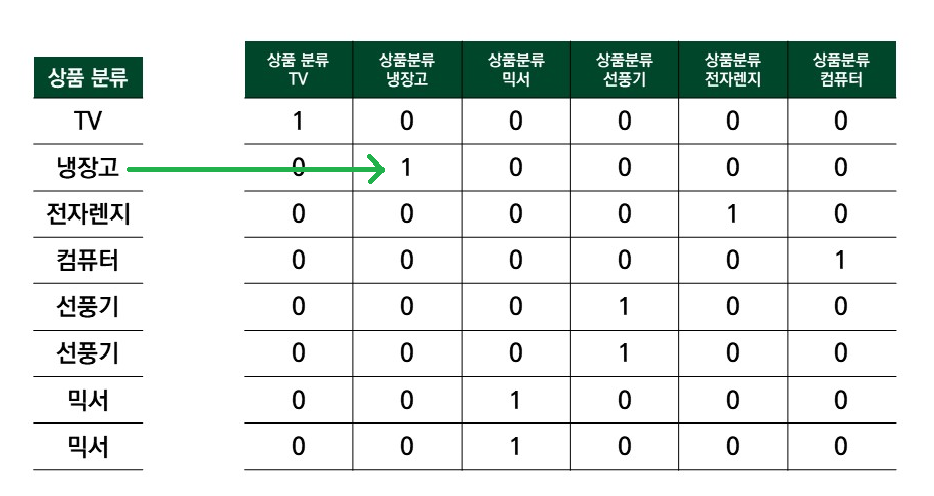

In [50]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#  LabelEncoder로 문자열 값을 숫자형으로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원-핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 판다스의 API를 이용하면 더 쉽게 원-핫 인코딩을 수행할 수 있다.
- 문자열 카테고리 값을 숫자 형으로 변환할 필요가 없다.

In [51]:
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### | 피처 스케일링과 정규화
___
- 피처 스케일링(Feature Scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적으로 표준화(Standardization)와 정규화(Normalization)가 있다.
  1. 표준화 : 데이터의 Feature 각각을 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
  $${x_i}\_{new} = \frac{x_i - mean(x)}{stdev(x)}$$
  2. 정규화 : 서로 다른 Feature의 크기를 통일하기 위해 크기를 변환하는 것
  $${x_i}\_{new} = \frac{x_i - min(x)}{max(x)-min(x))}$$
- 사이킷런의 전처리에서 제공하는 Normalizer 모듈은 큰 개념 면에서 일반적인 정규화와 비슷하지만, 약간의 차이가 있다.
- 사이킷런의 Normalizer 모듈은 선형대수학의 정규화 개념이 적용되어, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다.
$${x_i}\_{new} = \frac{x_i}{\sqrt{{x_i}^2 + {y_i}^2 + {z_i}^2}}$$

#### | StandardScaler
___
- **표준화**를 지원하는 피처 스케일링 클래스
- 개별 Feature를 평균이 0이고 분산이 1인 값으로 변환한다.
- 사이킷런에서 구현한 RBF 커널을 이용하는 SVM이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하기 때문에 사전에 표준화를 꼭 적용해야 한다.

In [52]:
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

# 표준화 전 평균, 분산 값 확인
print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [53]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환
scaler.fit(iris_df)

# 표준화
iris_scaled = scaler.transform(iris_df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### | MiniMaxScaler
___
- 데이터값을 0과 1 사이의 범위 값으로 변환한다.
- 음수의 경우 절대값으로 변환한다.
- 데이터의 분포가 가우시안 분포가 아닐 경우, Min, Max Scale을 적용할 수 있다.

In [54]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터셋 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### | 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
___
- StandardScaler나 MinMax Scaler와 같은 Scaler 객체를 애용해 데이터를 스케일링할 때, `fit()`, `transform()`, `fit_transform()` 메소드를 사용한다.
  1. `fit()` : 데이터 변환을 위한 기준 정보 설정(최대값이나 최소값 등)
  2. `transform()` : 설정된 정보를 이용해 데이터를 변환
  3. `fit_transform()` : `fit()`과 `transform()`를 한 번에 적용
- 그런데 학습 데이터셋과 테스트 데이터셋에 `fit()`, `transform()`를 적용할 때 주의가 필요하다.
  * 학습 데이터에 `fit()`, `transform()`을 적용하여 스케일링하였다면 테스트 데이터에도 같은 기준으로 메소드를 적용하여 스케일링해야 올바른 예측 결과를 도출한다.

In [55]:
from sklearn.preprocessing import MinMaxScaler

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [56]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [57]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 확인할 수 있다.
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다. 

In [58]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# scaler.fit(test_array) 하지 않음
# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


따라서 다음과 같은 점들에 유의하여 스케일링해야 한다.
1. 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 불가능할 경우, 테스트 데이터 변환 시에는 `fit()`이나 `fit_transform()`을 적용하지 않고 **학습 데이터로 이미 fit()된 Scalar 객체를 이용**해 `transform()`으로 변환